# what is the distribution of $p_p$ in the GENIE level?
1. in the overlay
2. in a GENIE-only sample

by comparing them I can check the consistency

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
%matplotlib inline

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/mAextraction/Figures/Pp/'

In [3]:
versions['data date'] = '2018_05_11'
versions['overlay date'] = '2018_05_11'
versions['Overlay'] = 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2'

In [6]:
GENIE_overlay = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/genie/2018_05_11/prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2_2018_05_11_genie.csv')
print len(GENIE_overlay),' GENIE interaction'

926088  GENIE interaction


In [7]:
GENIE_overlay_CC1p0pi = GENIE_overlay[(GENIE_overlay['IsCC_1p_200MeVc_0pi']==True)]
print len(GENIE_overlay_CC1p0pi),'GENIE CC1p0π events in overlay'

243732 GENIE CC1p0π events


In [38]:
GENIE_only = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/mA/genie_files/uboone_CCinclMEC_argon40_numu_mA_0_99.csv')
GENIE_only_CC1p0pi = GENIE_only[GENIE_only['IsCC_1p_200MeVc_0pi']==True]
print len(GENIE_only_CC1p0pi),'GENIE CC1p0π events in GENIE-only samlpe'

36101 GENIE CC1p0π events in GENIE-only samlpe


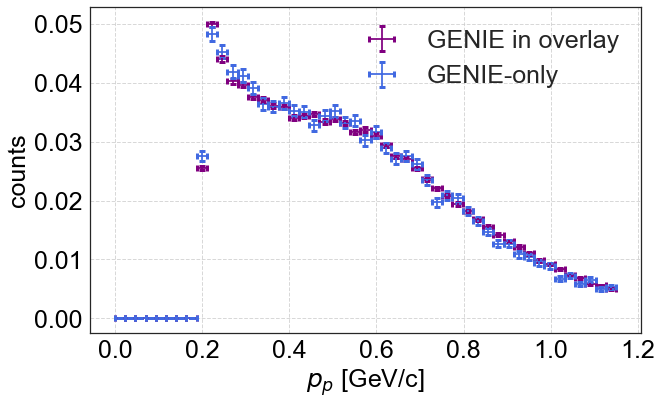

In [49]:
fig,ax=plt.subplots(figsize=(9.88,6))
bins=linspace(0.,1.15,50)
for sam,slabel,var,color in zip([GENIE_overlay_CC1p0pi,GENIE_only_CC1p0pi]                                
                                ,['GENIE in overlay','GENIE-only']
                                ,['truth_Pp','Pp']
                                ,['purple','royalblue']):
    h,edges = np.histogram(sam[var],bins=bins)
    h_err = np.sqrt(h)
    Int = np.sum(h)
    h = h.astype(np.float)/Int
    h_err = h_err.astype(np.float)/Int
    mid = 0.5*(edges[1:]+edges[:-1])
    bin_width=0.5*(edges[1]-edges[0])
    plt.errorbar(x=mid,xerr=bin_width
                 ,y=h
                 ,yerr=h_err
                 ,color=color
                 ,markersize=2,fmt='s',capsize=3,capthick=3,label=slabel)
set_axes(ax, x_label=r'$p_p$ [GeV/c]', y_label=r'counts'
         ,do_add_grid=True,do_add_legend=True,legend_loc='best')
# ax.set_yscale('log')

In [46]:
def get_R_vs_mA(var=None,mA_array=None,CC1p0pi=None,low_bins=None,high_bins=None):
    
    R_vs_mA = pd.DataFrame(columns=['mA','R','Rerr'])
    for i_mA,mA in enumerate(mA_array): # S.Dytman: GENIE assumes mA=0.99 GeV/c2 (Dec-30)
        sample = CC1p0pi['mA=%.2f'%mA]
        N_inbin=[]
        for vmin,vmax in zip(low_bins,high_bins):
            sample_inbin = sample[(sample[var]>vmin)&(sample[var]<vmax)]
            N_inbin.append(float(len(sample_inbin)))
        R_vs_mA = R_vs_mA.append({'mA': mA
                                  ,'R':N_inbin[0]/N_inbin[1]
                                  ,'Rerr':(N_inbin[0]/N_inbin[1])*sqrt(1./N_inbin[0]+1./N_inbin[1])
                                 }, ignore_index=True)
    return R_vs_mA
    

def observable_low_high_ratio(var='Pp',mA_array=None,figsize=(14,8)
                              ,do_add_genie_overlay=True
                              ,var_min=0.25,var_mid=0.6,var_max=1.75):

    low_bins,high_bins = np.array([var_min,var_mid]),np.array([var_mid,var_max])                    
    var_centers = 0.5*(low_bins + high_bins)

    R_vs_mA_GENIE = get_R_vs_mA(var=var,mA_array=mA_array,CC1p0pi=CC1p0pi,low_bins=low_bins,high_bins=high_bins) 
    fig,ax=plt.subplots(figsize=figsize)
    plt.errorbar(x=R_vs_mA_GENIE['mA'],xerr=0
                 ,y=R_vs_mA_GENIE['R'],yerr=R_vs_mA_GENIE['Rerr']
                 ,fmt='o',label='genie (Afro)',markersize=15)
        
    set_axes(ax,r'$m_A$ (GeV/c$^2$)'
             ,r'$('+var+'<%.1f)/'%var_mid+'('+var+'>%.1f)$'%var_mid+' ratio',do_add_grid=True,do_add_legend=True)
    
    

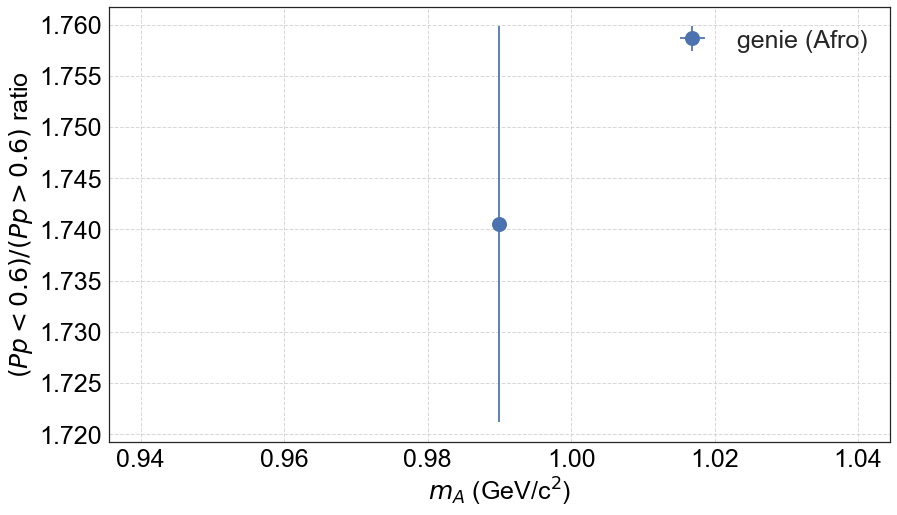

In [47]:
CC1p0pi = dict({'mA=0.99':GENIE_only_CC1p0pi})
observable_low_high_ratio(var='Pp'
                          ,mA_array=[0.99]
                          ,var_min=0.0,var_max=1.2,var_mid=0.6)